<a href="https://colab.research.google.com/github/napsternxg/ipython-notebooks/blob/master/SVD_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N, d = 1000, 2
k_true = 5
noise_ratio = 0.08
mu_true = np.random.randn(1, k_true, d)
membership_idx = np.random.randint(k_true, size=(N,1))
z_i = (membership_idx == np.arange(k_true))[:, :, np.newaxis]
# Mixture distribution
X = (np.random.randn(N, k_true, d)*noise_ratio  + (z_i * mu_true)).sum(axis=1)
(z_i * mu_true).shape, X.shape

((1000, 5, 2), (1000, 2))

In [ ]:
z_i.sum(axis=0)

array([[199],
       [191],
       [179],
       [195],
       [236]])

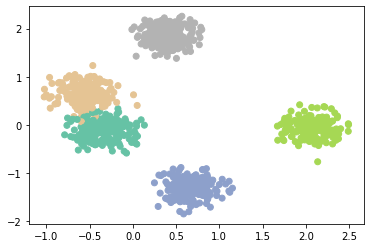

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=membership_idx, cmap="Set2")

In [ ]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
U.shape, s.shape, VT.shape

((1000, 2), (2,), (2, 2))

In [ ]:
X_approx = (U @ np.diag(s) @ VT)
X_approx.shape, ((X - X_approx)**2).sum()

((1000, 2), 5.775402455856939e-29)

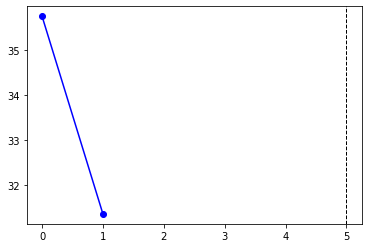

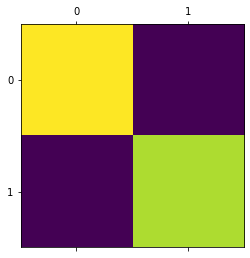

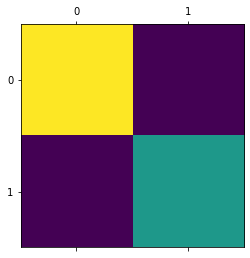

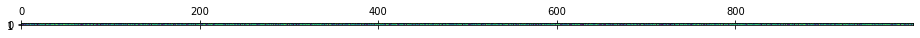

In [ ]:
plt.plot(s, "-bo")
plt.axvline(x=k_true, color="k", lw=1, linestyle="--")
plt.matshow(np.diag(s))
plt.matshow(VT)
plt.matshow(U.T)


In [ ]:
U[:, :k_true].shape, s[:k_true].shape, VT[:k_true, :].shape

((1000, 2), (2,), (2, 2))

In [ ]:
X_approx = (U[:, :k_true] @ np.diag(s)[:k_true, :k_true] @ VT[:k_true, :])
X_approx.shape, ((X - X_approx)**2).sum()

((1000, 2), 5.775402455856939e-29)

In [ ]:
X_reduced = VT[:k_true]
X_reduced.shape

(2, 2)

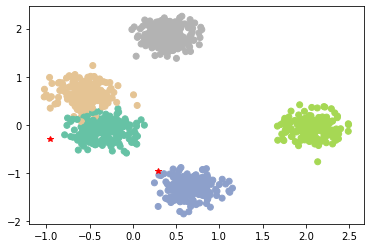

In [ ]:
plt.scatter(X_approx[:, 0], X_approx[:, 1], c=membership_idx, cmap="Set2")
plt.plot(X_reduced[:, 0], X_reduced[:, 1], "*r")

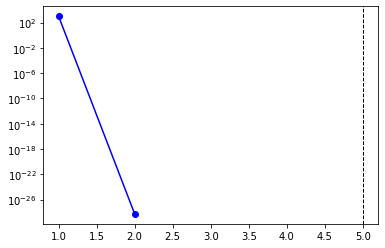

In [ ]:
approx_err = []
for i in range(1, d+1):
  X_approx = (U[:, :i] @ np.diag(s)[:i, :i] @ VT[:i, :])
  e = ((X - X_approx)**2).sum()
  approx_err.append(e)
plt.plot(range(1, d+1), approx_err, "-bo")
plt.axvline(x=k_true, color="k", lw=1, linestyle="--")
plt.yscale("log")

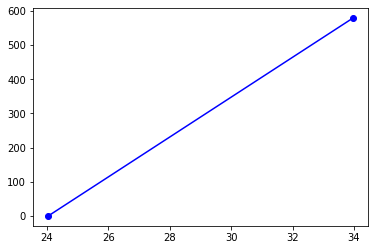

In [ ]:
plt.plot(s, approx_err, "-bo")
# plt.yscale("log")

In [ ]:
(X @ VT[:k_true, :].T).shape

(1000, 2)

In [ ]:
idx = np.argsort(membership_idx.ravel())
idx.shape

(1000,)

In [ ]:
membership_idx.shape

(1000, 1)

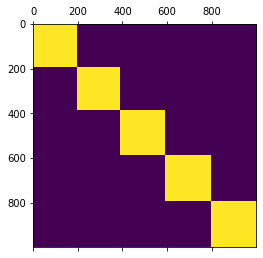

In [ ]:
plt.matshow((membership_idx[idx] == membership_idx[idx].ravel()))

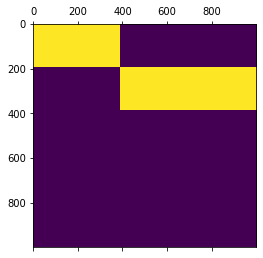

In [ ]:
plt.matshow((X[idx] @ VT[:k_true, :].T).argmax(axis=-1) == z_i[idx].argmax(axis=1))

In [ ]:
(X[idx] @ VT[:k_true, :].T).argmax(axis=-1).shape

(1000,)

((1000, 2), (2, 2), (2, 2))

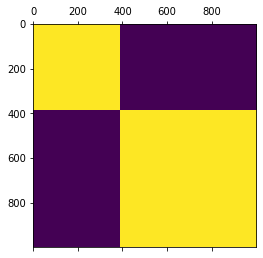

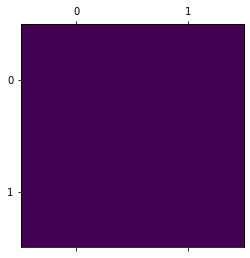

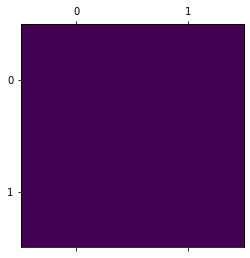

In [ ]:
# i = k_true + 30
i = d
X_vtt = (X[idx] @ VT[:i, :].T)
X_ut = (U[:, :i].T @ X[idx])
X_utxv = (U[:, :i].T @ X[idx] @ VT[:i, :].T)
plt.matshow(X_vtt.argmax(axis=-1)[:, np.newaxis] == X_vtt.argmax(axis=-1))
plt.matshow(X_ut.argmax(axis=-1)[:, np.newaxis] == X_ut.argmax(axis=-1))
plt.matshow(X_utxv.argmax(axis=-1)[:, np.newaxis] == X_utxv.argmax(axis=-1))
X_vtt.shape, X_ut.shape, X_utxv.shape